In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import torch

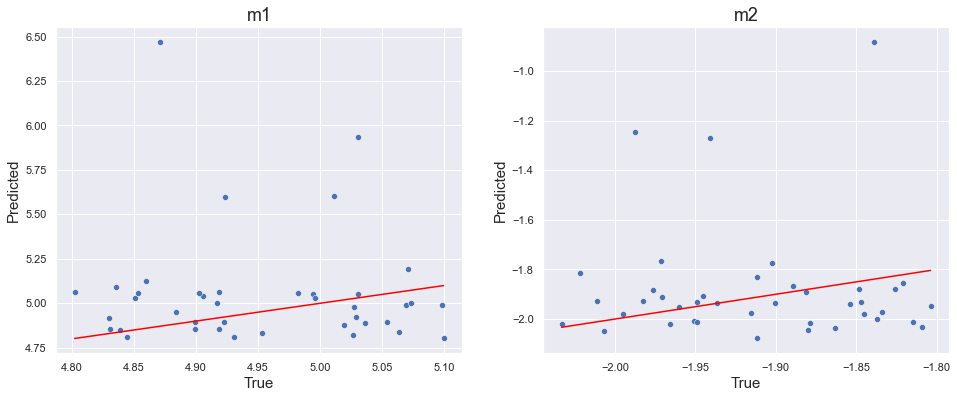

In [13]:
df = pd.read_csv('D:/Masters/NS_EoS/NeutronStars/plots/results.csv')
#df.head()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('m1',fontsize=18)
sns.scatterplot( x=df['true_m1'], y=df['pred_m1'],ax=ax1)
p1 = sns.lineplot(x=df['true_m1'], y=df['true_m1'],color='red',ax=ax1)
p1.set_xlabel('True', fontsize=15)
p1.set_ylabel('Predicted', fontsize=15)

ax2.set_title('m2',fontsize=18)
sns.scatterplot( x=df['true_m2'], y=df['pred_m2'],ax=ax2)
p2 = sns.lineplot(x=df['true_m2'], y=df['true_m2'],color='red',ax=ax2)
p2.set_xlabel('True', fontsize=15)
p2.set_ylabel('Predicted', fontsize=15)

plt.show()

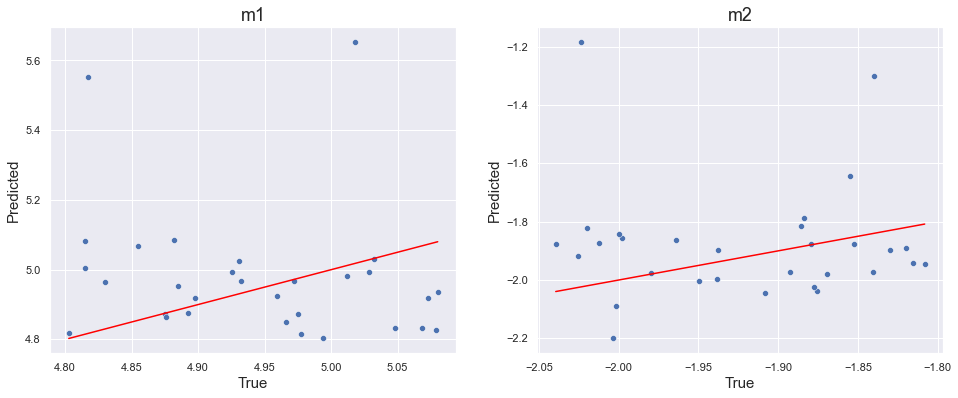

In [8]:
# plot true vs predicted

df3 = pd.read_csv('D:/Masters/NS_EoS/NeutronStars/plots/m1_10_30_constant.txt', sep='\t', header=None,names=['true','predicted'])
df4 = pd.read_csv('D:/Masters/NS_EoS/NeutronStars/plots/m2_10_30_constant.txt', sep='\t', header=None,names=['true','predicted'])

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('m1',fontsize=18)
sns.scatterplot( x=df3['true'], y=df3['predicted'],ax=ax1)
p1 = sns.lineplot(x=df3['true'], y=df3['true'],color='red',ax=ax1)
p1.set_xlabel('True', fontsize=15)
p1.set_ylabel('Predicted', fontsize=15)

ax2.set_title('m2',fontsize=18)
sns.scatterplot( x=df4['true'], y=df4['predicted'],ax=ax2)
p2 = sns.lineplot(x=df4['true'], y=df4['true'],color='red',ax=ax2)
p2.set_xlabel('True', fontsize=15)
p2.set_ylabel('Predicted', fontsize=15)

plt.show()

In [ ]:

#m1_files = sorted(glob.glob("D:/Masters/NS_EoS/NeutronStars/plots/m1*.txt"))
for c in range(-5,6,1):
    m1_file = "D:/Masters/NS_EoS/NeutronStars/plots/m1_"+str(c)+".txt"
    m2_file = m1_file.replace('m1','m2')
    df1 = pd.read_csv(m1_file, sep='\t', header=None,names=['true','predicted'])
    df2 = pd.read_csv(m2_file, sep='\t', header=None,names=['true','predicted'])
    #print(m1_file,m2_file)
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
    constant = '+' + m1_file[40:-4] if len(m1_file[40:-4]) == 1 else m1_file[40:-4]
    fig.suptitle('Radius = r_regressor'+constant,fontsize=18)
    ax1.set_title('m1',fontsize=15)
    sns.scatterplot( x=df1['true'], y=df1['predicted'],ax=ax1)
    p1 = sns.lineplot(x=df1['true'], y=df1['true'],color='red',ax=ax1)
    p1.set_xlabel('True', fontsize=15)
    p1.set_ylabel('Predicted', fontsize=15)

    ax2.set_title('m2',fontsize=15)
    sns.scatterplot( x=df2['true'], y=df2['predicted'],ax=ax2)
    p2 = sns.lineplot(x=df2['true'], y=df2['true'],color='red',ax=ax2)
    p2.set_xlabel('True', fontsize=15)
    p2.set_ylabel('Predicted', fontsize=15)

plt.show()

In [ ]:
import numpy as np

scale = 1
sample_type = "tight"

# Tight coefficients
nh_tight = 0.3
log_teff_tight = 0.01s
dist_tight = 0.05

# Loose coefficients
nh_loose = 0.5
log_teff_loose = 0.025
dist_loose = 0.2

# Example nuisance parameters; real ones come from dataset obvi
nuisance_parameters = np.random.rand(1000, 3)

np_min = np.min(nuisance_parameters, axis=0)
np_max = np.max(nuisance_parameters, axis=0)

# Generate numbers between -1 and 1 with the same shape as the nuisance_parameters matrix
random_sample = scale * np.random.uniform(-1, 1, size=nuisance_parameters.shape)

# Easiest way to think through this is to walk through the case where random_sample is all 1s
# and again when random_sample is all -1s
# In those cases you would be at the widths of the sampling ranges
if sample_type == "tight":
    uncertainty = np.array([nh_tight, log_teff_tight, dist_tight]) * random_sample
else:
    uncertainty = np.array([nh_loose, log_teff_loose, dist_loose]) * random_sample

uncertainty += np.ones_like(uncertainty)

# Clip the nuisance_parameters according to the data distribution
sampled_nuisance_parameters = np.clip(
    nuisance_parameters * uncertainty,
    np_min,
    np_max
)

print(sampled_nuisance_parameters)

In [ ]:
df1 = pd.read_csv('D:/Masters/NS_EoS/NeutronStars/res_mr_abc.txt', sep='\t', header=None,names=['pred_mass','pred_radius','true_mass','true_radius'])

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Mass',fontsize=18)
sns.scatterplot( x=df1['true_mass'], y=df1['pred_mass'],ax=ax1)
p1 = sns.lineplot(x=df1['true_mass'], y=df1['true_mass'],color='red',ax=ax1)
p1.set_xlabel('True', fontsize=15)
p1.set_ylabel('Predicted', fontsize=15)

ax2.set_title('Radius',fontsize=18)
sns.scatterplot( x=df1['true_radius'], y=df1['pred_radius'],ax=ax2)
p2 = sns.lineplot(x=df1['true_radius'], y=df1['true_radius'],color='red',ax=ax2)
p2.set_xlabel('True', fontsize=15)
p2.set_ylabel('Predicted', fontsize=15)

plt.show()

Text(0, 0.5, 'Fraction')

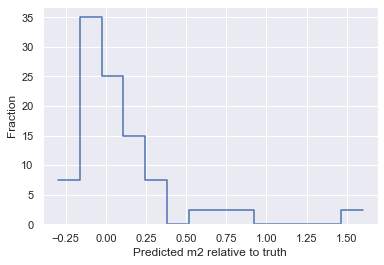

In [34]:

df = pd.read_csv('D:/Masters/NS_EoS/NeutronStars/plots/results.csv')
df.head()
plt = sns.histplot(data=df, x=df['pred_m1'] - df['true_m1'],element="step", fill=False,stat = 'percent')
plt.set_xlabel("Predicted m1 relative to truth")
plt.set_ylabel("Fraction")

In [4]:
import numpy as np
pred = torch.load('predictions.pt')
# 3 batchs , 2 outputs , 128 eos pairs
true_m1 = []
true_m2 = []
pred_m1 = []
pred_m2 = []
for batch in pred:
    for true in batch[0]:
        true_m1.append(np.float64(true[0]))
        true_m2.append(np.float64(true[1]))
    for pred in batch[1]:
        pred_m1.append(np.float64(pred[0]))
        pred_m2.append(np.float64(pred[1]))

df = pd.DataFrame({'true_m1':true_m1,'true_m2':true_m2,'pred_m1':pred_m1,'pred_m2':pred_m2})
print(df.info())
df['res_m1'] = abs(df.pred_m1 -df.true_m1)
df['res_m2'] = abs(df.pred_m2 - df.true_m2)
#df = df[df.res_m1 < 0.5]
#df = df[df.res_m2 < 0.3]
print(df.info())
#true_eos = [ random.random()*0.3 + 4.80, -2.05 + random.random()*0.25 ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   true_m1  330 non-null    float64
 1   true_m2  330 non-null    float64
 2   pred_m1  330 non-null    float64
 3   pred_m2  330 non-null    float64
dtypes: float64(4)
memory usage: 10.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   true_m1  330 non-null    float64
 1   true_m2  330 non-null    float64
 2   pred_m1  330 non-null    float64
 3   pred_m2  330 non-null    float64
 4   res_m1   330 non-null    float64
 5   res_m2   330 non-null    float64
dtypes: float64(6)
memory usage: 15.6 KB
None


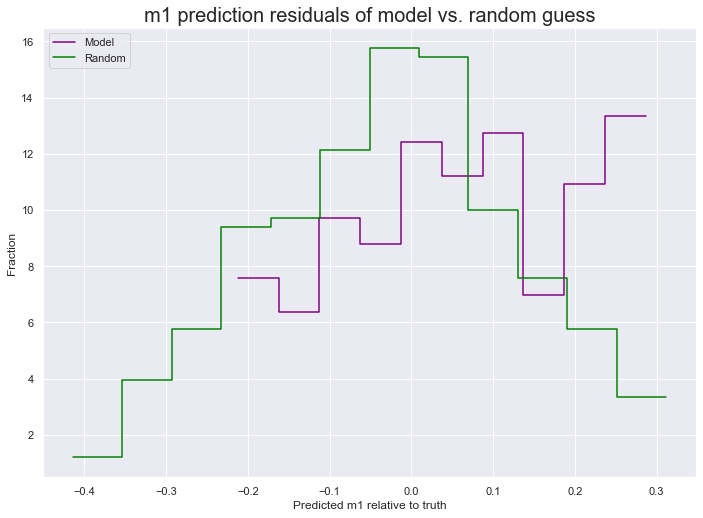

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
random_m1 = 4.8 + np.random.rand(len(df.pred_m1))*0.3
plt = sns.histplot(data=df, x=df['pred_m1'] - df['true_m1'],element="step", fill=False,stat = 'percent',color='purple')
plt = sns.histplot(x=random_m1 - df['true_m1'],element="step", fill=False,stat = 'percent',color = 'green')
plt.set_xlabel("Predicted m1 relative to truth")
plt.set_ylabel("Fraction")
plt.set_title("m1 prediction residuals of model vs. random guess",fontsize=20)
plt.legend(loc='upper left', labels=['Model', 'Random'])

Text(0.5, 1.0, 'm2 prediction residuals of model vs. random guess')

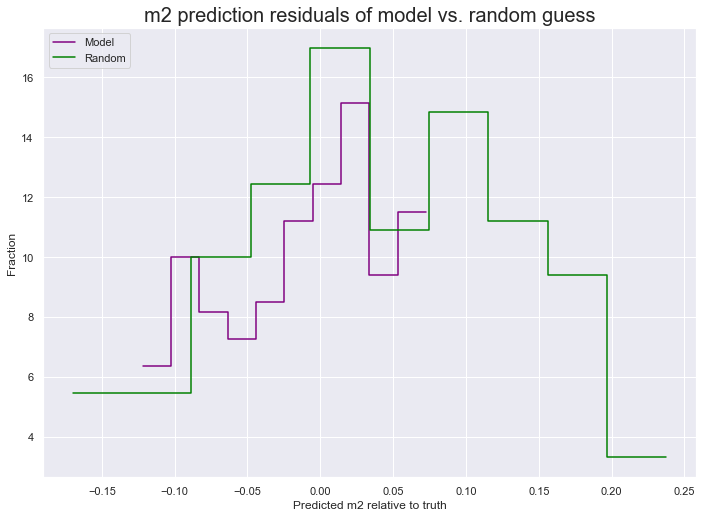

In [6]:
plt1 = sns.histplot(data=df, x=df['pred_m2'] - df['true_m2'],element="step", fill=False,stat = 'percent',color='purple')
random_m2 = -2.05 + np.random.rand(len(df.pred_m2))*0.25
plt1 = sns.histplot(x=random_m2 - df['true_m2'],element="step", fill=False,stat = 'percent',color='green')
plt1.set_xlabel("Predicted m2 relative to truth")
plt1.set_ylabel("Fraction")
plt1.legend(loc='upper left', labels=['Model', 'Random'])
plt1.set_title("m2 prediction residuals of model vs. random guess",fontsize=20)